In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("cosmetics.csv")

In [11]:
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


<Axes: ylabel='Frequency'>

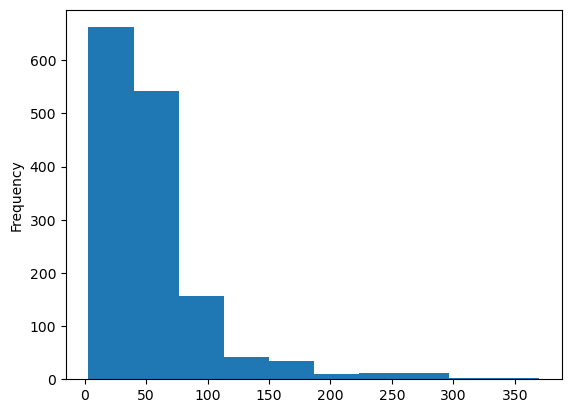

In [12]:
df["Price"].plot.hist()


<Axes: ylabel='Frequency'>

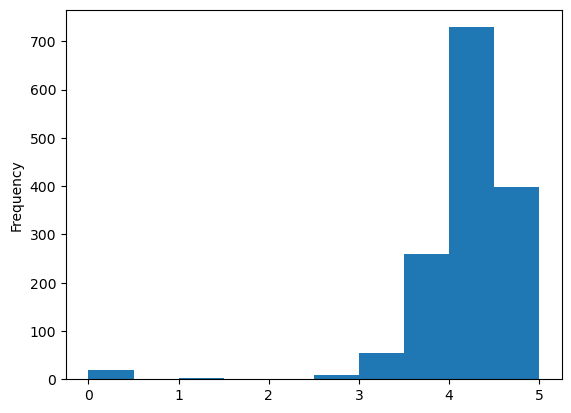

In [13]:
df['Rank'].plot.hist()

In [14]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: x.strip().split(" "))


In [15]:
def remove_sign(li):
    temp_li = []
    count = 0
    for i in li:
        while "" in i:
            i.remove("")
        for j in range(len(i)):
            if i[j][0] == "(" and i[j][-1]==")":
                i[j] = i[j][1:-1]
                
            elif i[j][-1] == "," or i[j][-1]==":" or i[j][-1]=="." or i[j][-1] == ")":
                i[j] = i[j][0:-1]
                
            elif i[j][0] == "-" or i[j][0] == "(" or i[j][0] == "*":
                i[j]=i[j][1:]
                
        temp_li.append(i)
    return temp_li



In [17]:
df['Ingredients'] = remove_sign(df['Ingredients'])
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"[Algae, Seaweed, Extract, Mineral, Oil, Petrol...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"[Galactomyces, Ferment, Filtrate, Pitera, Buty...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"[Water, Dicaprylyl, Carbonate, Glycerin, Cetea...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"[Algae, Seaweed, Extract, Cyclopentasiloxane, ...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"[Water, Snail, Secretion, Filtrate, Phenyl, Tr...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"[Water, Alcohol, Denat, Potassium, Cetyl, Phos...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"[Water, Isododecane, Dimethicone, Butyloctyl, ...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"[Water, Dihydroxyacetone, Glycerin, Sclerocary...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"[Water, Dihydroxyacetone, Propylene, Glycol, P...",0,0,0,0,0


In [18]:
x = []
y = []
for i in df['Ingredients']:
    for j in range(len(i)):
        x.append(i[j])
        y.append(i[j])

In [21]:
for i in range(len(x)):
    if len(i) == 0:
        print(red_signal)

Algae
Seaweed
Extract
Mineral
Oil
Petrolatum
Glycerin
Isohexadecane
Microcrystalline
Wax
Lanolin
Alcohol
Citrus
Aurantifolia
Lime
Extract
Sesamum
Indicum
Sesame
Seed
Oil
Eucalyptus
Globulus
Eucalyptus
Leaf
Oil
Sesamum
Indicum
Sesame
Seed
Powder
Medicago
Sativa
Alfalfa
Seed
Powder
Helianthus
Annuus
Sunflower
Seedcake
Prunus
Amygdalus
Dulcis
Sweet
Almond
Seed
Meal
Sodium
Gluconate
Copper
Gluconate
Calcium
Gluconate
Magnesium
Gluconate
Zinc
Gluconate
Magnesium
Sulfate
Paraffin
Tocopheryl
Succinate
Niacin
Water
Beta-Carotene
Decyl
Oleate
Aluminum
Distearate
Octyldodecanol
Citric
Acid
Cyanocobalamin
Magnesium
Stearate
Panthenol
Limonene
Geraniol
Linalool
Hydroxycitronellal
Citronellol
Benzyl
Salicylate
Citral
Sodium
Benzoate
Alcohol
Denat
Fragrance
Galactomyces
Ferment
Filtrate
Pitera
Butylene
Glycol
Pentylene
Glycol
Water
Sodium
Benzoate
Methylparaben
Sorbic
Acid
Water
Dicaprylyl
Carbonate
Glycerin
Cetearyl
Alcohol
Cetearyl
Olivate
Sorbitan
Olivate
Sclerocarya
Birrea
Seed
Oil
Bacillus/Soyb